In [1]:
from prony.prony import prony

from prony.TimeDomainData import TimeDomainData

from prony.fitting import (
    get_gammas_and_t,
    get_gamma_matrix, 
    get_correlation_function_matrix,
    get_freq_matrix,
    get_expn,
    optimize
)

from prony.spectral import BO
from prony.spectral import get_spectral_function_from_exponentials
from prony.spectral import bose_function

In [2]:
import numpy as np

In [ ]:
beta = 1 / 10
data = TimeDomainData(BO, bose_function, beta, tf=100)

nmode_real = 1
nmode_imag = 2
expn, etal = prony(data, nmode_real, nmode_imag)

2023-11-26 11:36:11 [info     ] Staring the prony fitting program.
2023-11-26 11:36:11 [info     ] Building the Hankel matrix and running Takagi factorization...
2023-11-26 11:36:14 [info     ] The Hankel process is done!
2023-11-26 11:36:14 [info     ] <Hankel dim=1000, with Takagi factorization error (real: 5.519876521367436e-10, imag: 1.1186056697105336e-10)>
2023-11-26 11:36:14 [info     ] Solving for the gamma values from the eigen values...


In [ ]:
etal

In [ ]:
data.plot()

In [ ]:
len_ = 10000
spe_wid = 10

w = np.append(np.linspace(-spe_wid, 0, len_), np.linspace(0, spe_wid, len_))
jw_exact = BO(w) * bose_function(w, beta)
jw_prony = get_spectral_function_from_exponentials(w, expn, etal).real

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plt.plot(w, jw_exact)
plt.plot(w, jw_prony)

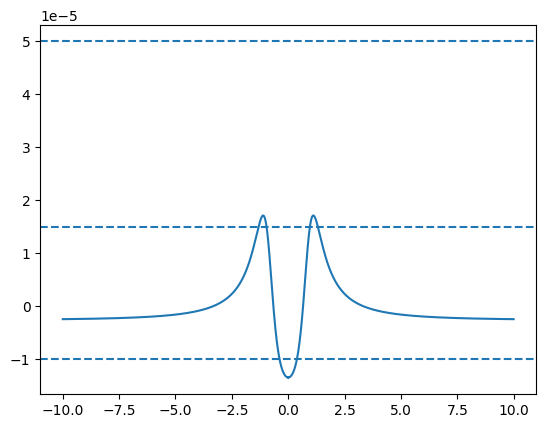

In [30]:
plt.plot(w, jw_exact - jw_prony)
plt.axhline(1.5e-5, ls='--')
plt.axhline(5e-5, ls='--')
plt.axhline(-1.0e-5, ls='--')